# COLLISION PREDICTION ANALYSIS

## This is a Final Capstone Project of Data Science Course. The project aims to develop a model to predict collision by using Machine Learing algorithms. 


 ### Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone project course.')

Hello Capstone project course.


## Introduction/Business Problem

The project aims at  prediction of collision in Seattle area by using  supervised learning and  develop a model to predict the severity of an accident for given attributes like weather, road conditions etc. The stakeholder can alert the driver by prediction of collision and reduce the severity of collision or avoid the collision.

## Data Understanding

In this project, we will use  the data provided by the SPD about accidents occurred in Seattle area. The data set contains 37 attributes and 194,673 incidents happened. The provided data is an unbalanced data.  The target variable will be "SEVERITYCODE" which is an exact measure of severity of accident rating from 0 to 5. The attributes used to measure severity are "WEATHER', 'ROADCON' and 'LIGHTCOND'.

### Exploratory Data Analysis

In [3]:

df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/Users/muralisankar2002/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
INTKEY             65070
LOCATION          191996
EXCEPTRSNCODE      84811
EXCEPTRSNDESC       5638
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SDOTCOLNUM        114936
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [6]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
# Visualising missing values in data frame.
mask = df.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis=1,join='outer', \
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, \
                         inplace=True)
missing_data

,count_missing,perc_missing
PEDROWNOTGRNT,190006,97.602646
EXCEPTRSNDESC,189035,97.103861
SPEEDING,185340,95.205807
INATTENTIONIND,164868,84.689710
INTKEY,129603,66.574718
EXCEPTRSNCODE,109862,56.434123
SDOTCOLNUM,79737,40.959455
JUNCTIONTYPE,6329,3.251093
X,5334,2.739979
Y,5334,2.739979


In [9]:
#!pip install missingno


In [10]:
import matplotlib.pyplot as plt

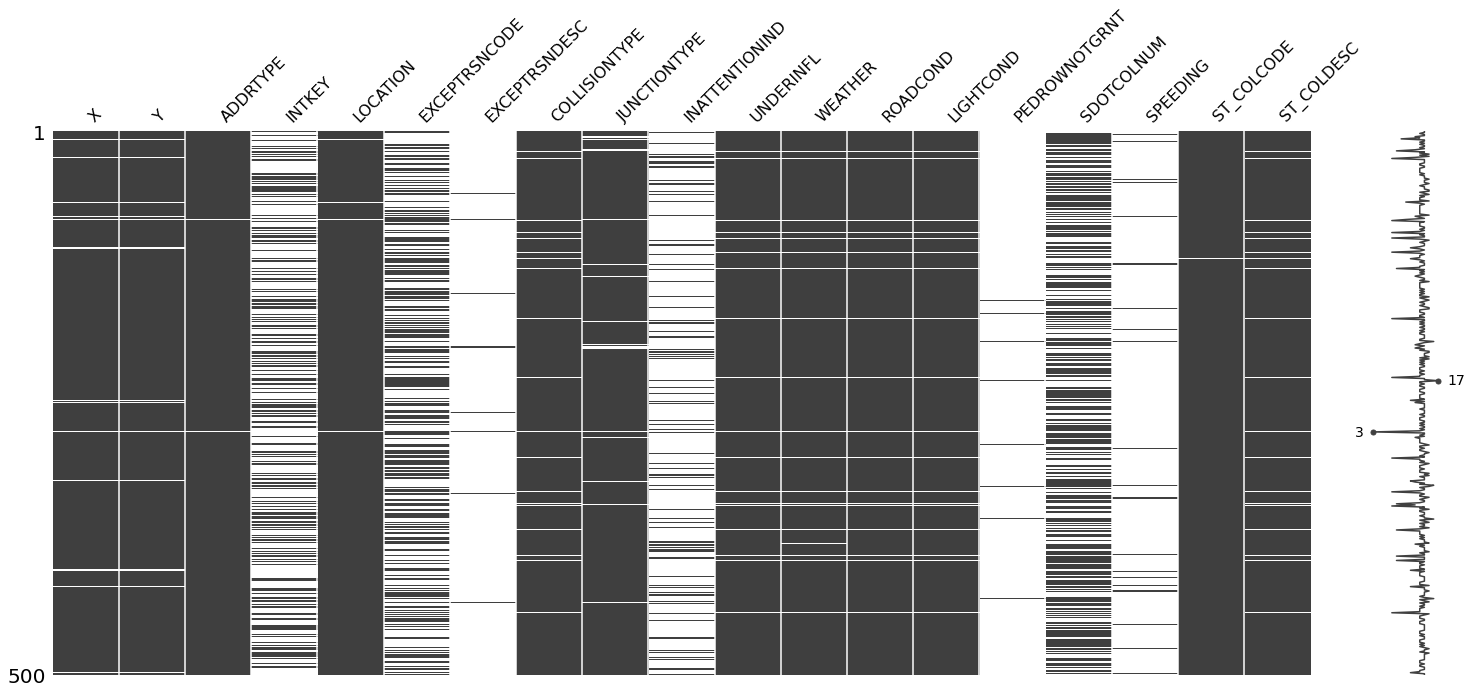

In [11]:
#To plot nullity matrix
import missingno as msno
nullable_columns = df.columns[mask.any()].tolist()
msno.matrix(df[nullable_columns].sample(500))
plt.show()

<AxesSubplot:>

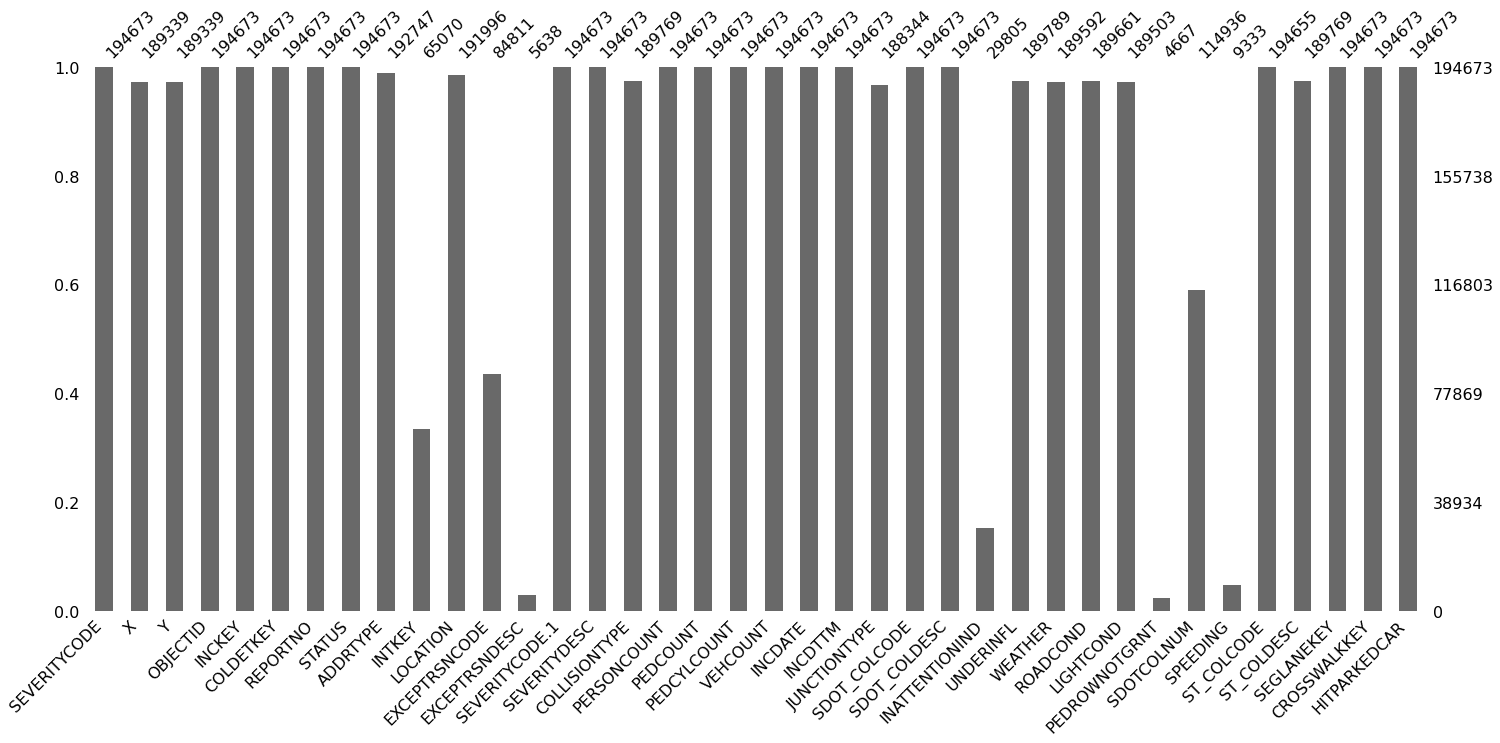

In [12]:
msno.bar(df)

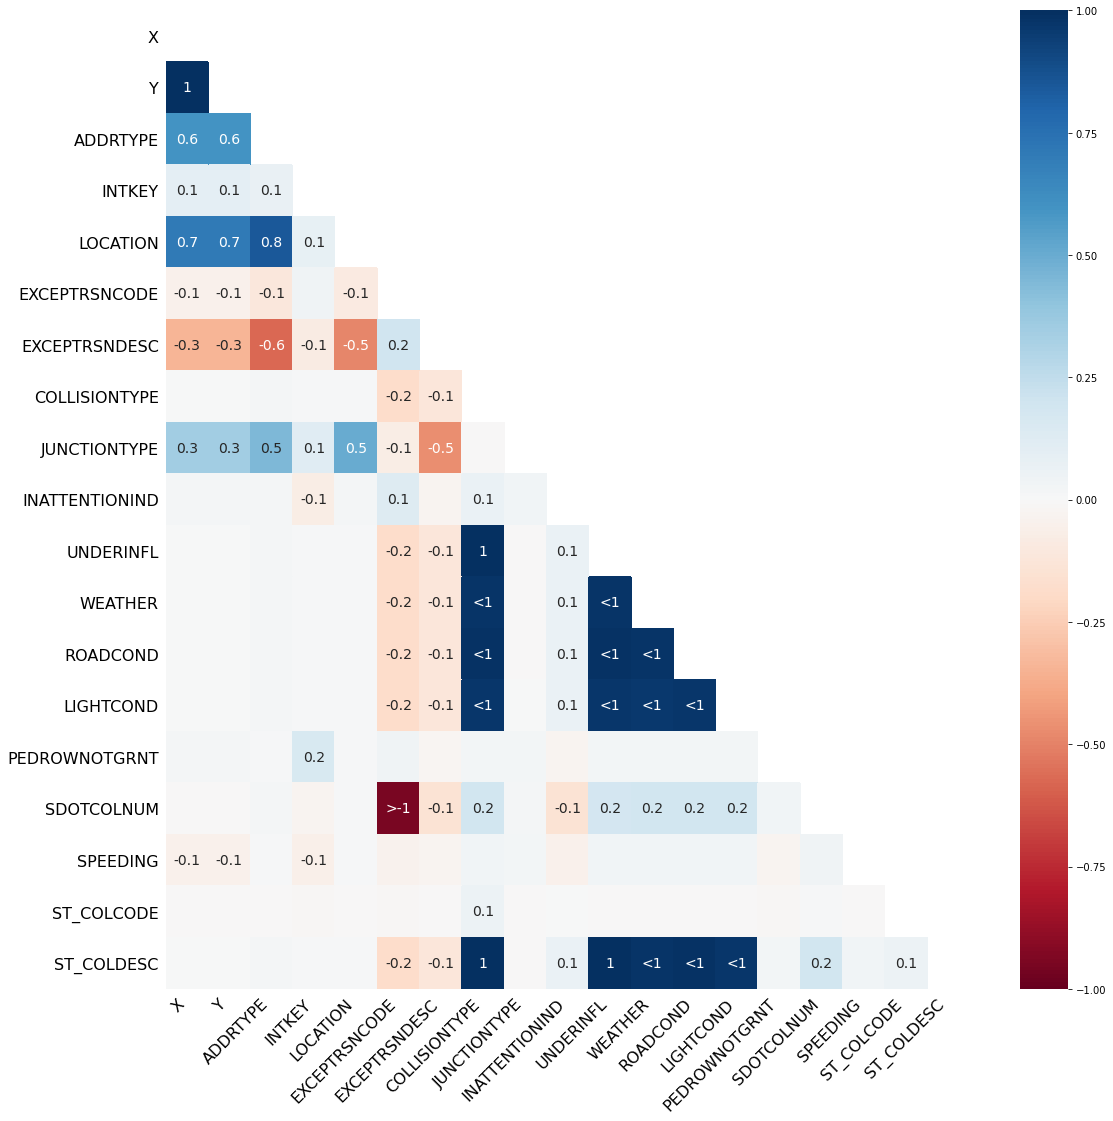

In [13]:
#Heat map
msno.heatmap(df[nullable_columns], figsize=(18,18))
plt.show()

<AxesSubplot:>

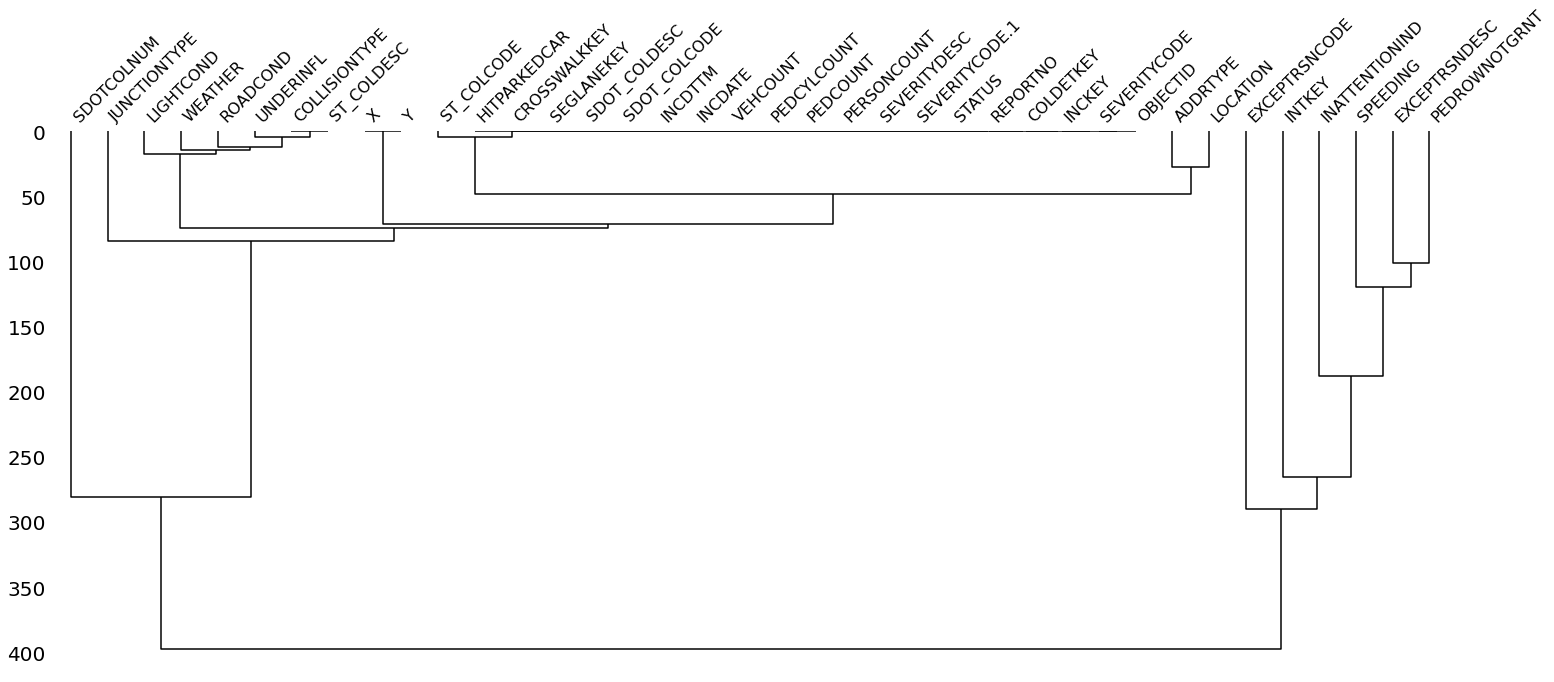

In [14]:
# To plot dendogram
msno.dendrogram(df)

In [15]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [16]:
df.drop(['EXCEPTRSNCODE', 'PEDROWNOTGRNT', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'INTKEY' ],axis='columns', inplace=True)

In [17]:
df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
LOCATION          191996
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
SDOTCOLNUM        114936
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [18]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Raining,Wet,Dark - Street Lights On,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Overcast,Dry,Daylight,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,Raining,Wet,Daylight,4028032.0,NaN,10,Entering at angle,0,0,N


In [19]:
df_speed = df.loc[~(df['SPEEDING'].isna())]

In [20]:
df_speed.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
24,2,-122.279658,47.553405,33,1268,1268,3672152,Matched,Intersection,RAINIER AVE S AND S BRANDON ST,...,Clear,Dry,Daylight,NaN,Y,14,From same direction - both going straight - on...,0,0,N
43,2,-122.337348,47.520472,53,56100,56100,2619853,Matched,Block,OLSON PL SW BETWEEN 2ND AVE SW AND 3RD AVE SW,...,Raining,Wet,Dark - Street Lights On,6256005.0,Y,50,Fixed object,0,0,N
62,1,-122.376182,47.499490,74,32000,32000,1215388,Matched,Block,35TH AVE SW BETWEEN 37TH AVE SW AND MARINE VIE...,...,Clear,Dry,Daylight,4176028.0,Y,32,One parked--one moving,0,0,N
123,1,-122.333924,47.604678,140,29700,29700,1482326,Matched,Block,MARION ST BETWEEN 2ND AVE AND 3RD AVE,...,Raining,Wet,Daylight,4065042.0,Y,14,From same direction - both going straight - on...,0,0,N
124,2,-122.322187,47.618733,141,1135,1135,3605976,Matched,Intersection,HARVARD AVE AND E DENNY WAY,...,Clear,Dry,Daylight,NaN,Y,10,Entering at angle,0,0,N


In [21]:
df_speed.count()

SEVERITYCODE      9333
X                 8720
Y                 8720
OBJECTID          9333
INCKEY            9333
COLDETKEY         9333
REPORTNO          9333
STATUS            9333
ADDRTYPE          9279
LOCATION          9246
SEVERITYCODE.1    9333
SEVERITYDESC      9333
COLLISIONTYPE     9332
PERSONCOUNT       9333
PEDCOUNT          9333
PEDCYLCOUNT       9333
VEHCOUNT          9333
INCDATE           9333
INCDTTM           9333
JUNCTIONTYPE      9223
SDOT_COLCODE      9333
SDOT_COLDESC      9333
UNDERINFL         9333
WEATHER           9325
ROADCOND          9330
LIGHTCOND         9328
SDOTCOLNUM        6395
SPEEDING          9333
ST_COLCODE        9332
ST_COLDESC        9332
SEGLANEKEY        9333
CROSSWALKKEY      9333
HITPARKEDCAR      9333
dtype: int64

In [22]:
from collections import Counter
dict(Counter(df_speed.SPEEDING))

{'Y': 9333}

In [23]:
df_speed_dict = dict((Counter(df_speed.X)))

In [24]:
df_speed_dict

{-122.2796585: 2,
 -122.33734799999999: 20,
 -122.37618229999998: 2,
 -122.33392350000001: 1,
 -122.3221868: 2,
 -122.31884: 3,
 -122.31205179999999: 1,
 -122.334195: 3,
 -122.28304409999998: 1,
 -122.329058: 1,
 -122.34674070000001: 1,
 -122.3361223: 1,
 -122.25144350000001: 4,
 -122.3339614: 2,
 -122.32773529999999: 6,
 -122.3803149: 1,
 nan: 1,
 -122.34731509999999: 6,
 -122.36297549999999: 2,
 -122.3235383: 1,
 -122.2962223: 20,
 -122.2773645: 2,
 nan: 1,
 -122.3762222: 4,
 -122.31271880000001: 1,
 -122.3654723: 1,
 -122.32671459999999: 4,
 -122.33515520000002: 1,
 -122.3134679: 1,
 -122.3347624: 28,
 -122.30247179999999: 1,
 -122.3551045: 1,
 -122.26995959999999: 3,
 -122.28995309999999: 1,
 -122.35006159999999: 1,
 -122.30843030000001: 2,
 -122.3555513: 1,
 -122.3477905: 3,
 -122.30461229999999: 7,
 -122.28484109999998: 3,
 -122.3401308: 1,
 -122.33355320000001: 1,
 -122.32296509999999: 1,
 -122.3331044: 3,
 -122.3345028: 15,
 -122.34494679999999: 7,
 -122.29448729999999: 6,
 -12

In [25]:
df_speed['X'].value_counts()

-122.346085    42
-122.339053    35
-122.334695    35
-122.329081    34
-122.337552    33
               ..
-122.357717     1
-122.376803     1
-122.292663     1
-122.290798     1
-122.327686     1
Name: X, Length: 4952, dtype: int64

In [26]:
df_speed_X1 = df_speed.loc[(df['X']== -122.34608519999999)]

In [27]:
df_speed_X1

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
2606,1,-122.346085,47.539248,2983,17077,17077,1795486,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Raining,Wet,Dark - Street Lights On,4282054.0,Y,11,From same direction - both going straight - bo...,0,0,N
9244,1,-122.346085,47.539248,11590,25819,25819,1198152,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Raining,Wet,Dark - Street Lights On,4318029.0,Y,30,From opposite direction - all others,0,0,N
16652,1,-122.346085,47.539248,20723,35514,35514,1790752,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Overcast,Ice,Dark - Street Lights On,5011003.0,Y,30,From opposite direction - all others,0,0,N
20535,2,-122.346085,47.539248,24830,38769,38769,2024674,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Overcast,Wet,Dark - Street Lights On,5305057.0,Y,26,From opposite direction - both going straight ...,0,0,N
22923,1,-122.346085,47.539248,27365,40945,40945,1795765,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Raining,Wet,Dark - Street Lights On,5306006.0,Y,50,Fixed object,0,0,N
23167,2,-122.346085,47.539248,27625,41356,41356,1077016,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Clear,Dry,Daylight,5224027.0,Y,14,From same direction - both going straight - on...,0,0,N
24730,2,-122.346085,47.539248,29280,44330,44330,1076699,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Raining,Wet,Dark - Street Lights On,5301030.0,Y,24,From opposite direction - both moving - head-on,0,0,N
25431,1,-122.346085,47.539248,30030,43773,43773,2023022,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Raining,Wet,Daylight,5309034.0,Y,23,From same direction - all others,0,0,N
28602,1,-122.346085,47.539248,33392,47136,47136,2060578,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Raining,Wet,Daylight,5296018.0,Y,50,Fixed object,0,0,N
29707,2,-122.346085,47.539248,34551,48176,48176,1795712,Matched,Block,HIGHLAND PARK WAY SW BETWEEN WEST MARGINAL WAY...,...,Overcast,Wet,Dark - Street Lights On,5026028.0,Y,24,From opposite direction - both moving - head-on,0,0,N


In [28]:
df_speed_X1.count()

SEVERITYCODE      42
X                 42
Y                 42
OBJECTID          42
INCKEY            42
COLDETKEY         42
REPORTNO          42
STATUS            42
ADDRTYPE          42
LOCATION          42
SEVERITYCODE.1    42
SEVERITYDESC      42
COLLISIONTYPE     42
PERSONCOUNT       42
PEDCOUNT          42
PEDCYLCOUNT       42
VEHCOUNT          42
INCDATE           42
INCDTTM           42
JUNCTIONTYPE      42
SDOT_COLCODE      42
SDOT_COLDESC      42
UNDERINFL         42
WEATHER           42
ROADCOND          42
LIGHTCOND         42
SDOTCOLNUM        30
SPEEDING          42
ST_COLCODE        42
ST_COLDESC        42
SEGLANEKEY        42
CROSSWALKKEY      42
HITPARKEDCAR      42
dtype: int64

In [29]:
df_speed_X1['SEVERITYCODE'].value_counts()

2    22
1    20
Name: SEVERITYCODE, dtype: int64

In [30]:
df_speed_X1['ROADCOND'].value_counts()


Wet      32
Dry       7
Ice       2
Other     1
Name: ROADCOND, dtype: int64

In [31]:
#!pip install folium

In [32]:
import folium

In [33]:
Seattle_map = folium.Map(location=[47.539248 ,-122.346085], zoom_start=15, tiles = 'Stamen Terrain')

# display world mapmexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=6, tiles='Stamen Terrain')
folium.Marker([47.539248 ,-122.346085]).add_to(Seattle_map)

Seattle_map

### At Riverview Playfield a sharp bend of the road is observed. When  the vehicle is speeding up and road is 'Wet'then may cause accident at this location with severity 2.

In [34]:
df.drop(['SPEEDING'],axis='columns', inplace=True)

In [35]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,N,Overcast,Wet,Daylight,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,0,Raining,Wet,Dark - Street Lights On,6354039.0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,Overcast,Dry,Daylight,4323031.0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,N,Clear,Dry,Daylight,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,0,Raining,Wet,Daylight,4028032.0,10,Entering at angle,0,0,N


In [36]:
df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
LOCATION          191996
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
SDOTCOLNUM        114936
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [37]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.034432,0.031342,0.031296,0.214218,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.034593,0.453657,0.109820


In [38]:
df_valid = df[['X', 'Y', 'SEVERITYCODE', 'ROADCOND', 'LIGHTCOND', 'WEATHER']]

In [39]:
df_valid.isnull().sum()

X               5334
Y               5334
SEVERITYCODE       0
ROADCOND        5012
LIGHTCOND       5170
WEATHER         5081
dtype: int64

In [40]:
df_valid = df_valid.dropna(how='any',axis=0) 

In [41]:
df_valid.isnull().sum()

X               0
Y               0
SEVERITYCODE    0
ROADCOND        0
LIGHTCOND       0
WEATHER         0
dtype: int64

In [42]:
df_valid.count()

X               184167
Y               184167
SEVERITYCODE    184167
ROADCOND        184167
LIGHTCOND       184167
WEATHER         184167
dtype: int64

In [43]:
df_valid['ROADCOND'].value_counts()

Dry               121871
Wet                46009
Unknown            13795
Ice                 1174
Snow/Slush           984
Other                116
Standing Water       102
Sand/Mud/Dirt         63
Oil                   53
Name: ROADCOND, dtype: int64

In [44]:
df_valid['WEATHER'].value_counts()

Clear                       108833
Raining                      31987
Overcast                     27105
Unknown                      13846
Snowing                        888
Other                          765
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [45]:
df_valid['LIGHTCOND'].value_counts()

Daylight                    113522
Dark - Street Lights On      47250
Unknown                      12416
Dusk                          5763
Dawn                          2422
Dark - No Street Lights       1450
Dark - Street Lights Off      1145
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [46]:
df_valid['SEVERITYCODE'].value_counts()

1    128154
2     56013
Name: SEVERITYCODE, dtype: int64

The class is imbalanced, we do Downsampling of majority class to balance the dataset.

In [47]:
from sklearn.utils import resample

In [48]:
# Separate majority and minority classes
df_majority = df_valid[df_valid.SEVERITYCODE==1]
df_minority = df_valid[df_valid.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=True, n_samples=56013, random_state = 125)
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()

2    56013
1    56013
Name: SEVERITYCODE, dtype: int64

In [49]:
df_downsampled.count()

X               112026
Y               112026
SEVERITYCODE    112026
ROADCOND        112026
LIGHTCOND       112026
WEATHER         112026
dtype: int64

In [50]:
df_downsampled['SEVERITYCODE'].value_counts()

2    56013
1    56013
Name: SEVERITYCODE, dtype: int64

In [51]:
df_downsampled['LIGHTCOND'].value_counts()

Daylight                    71047
Dark - Street Lights On     28555
Unknown                      5772
Dusk                         3581
Dawn                         1481
Dark - No Street Lights       814
Dark - Street Lights Off      666
Other                         102
Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

In [52]:
df_downsampled['WEATHER'].value_counts()

Clear                       67445
Raining                     19970
Overcast                    16797
Unknown                      6430
Snowing                       487
Other                         423
Fog/Smog/Smoke                367
Sleet/Hail/Freezing Rain       55
Blowing Sand/Dirt              35
Severe Crosswind               11
Partly Cloudy                   6
Name: WEATHER, dtype: int64

In [53]:
df_downsampled['ROADCOND'].value_counts()

Dry               75651
Wet               28611
Unknown            6397
Ice                 634
Snow/Slush          515
Standing Water       70
Other                69
Sand/Mud/Dirt        47
Oil                  32
Name: ROADCOND, dtype: int64

In [54]:
df_downsampled['ROADCOND'] = df_downsampled['ROADCOND'].replace(['Dry','Wet', 'Unknown','Ice', 'Snow/Slush',\
                                                         'Other','Standing Water', 'Sand/Mud/Dirt','Oil'],\
                                                          [1,2,3,4,5,6,7,8,9])

In [55]:
df_downsampled.head()

,X,Y,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
75719,-122.391776,47.519743,1,1,Daylight,Clear
62723,-122.309637,47.594251,1,1,Daylight,Clear
31994,-122.376215,47.668667,1,1,Daylight,Clear
77067,-122.329586,47.546694,1,1,Daylight,Overcast
103122,-122.313827,47.686694,1,1,Daylight,Clear


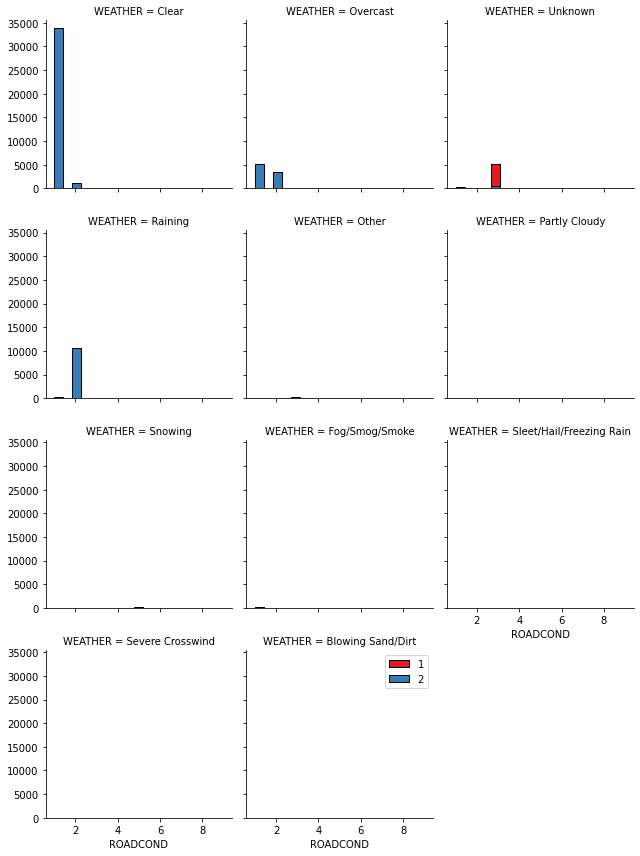

In [56]:
import seaborn as sns

bins = np.linspace(df_downsampled.ROADCOND.min(), df_downsampled.ROADCOND.max(), 20) 
g = sns.FacetGrid(df_downsampled, col="WEATHER", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

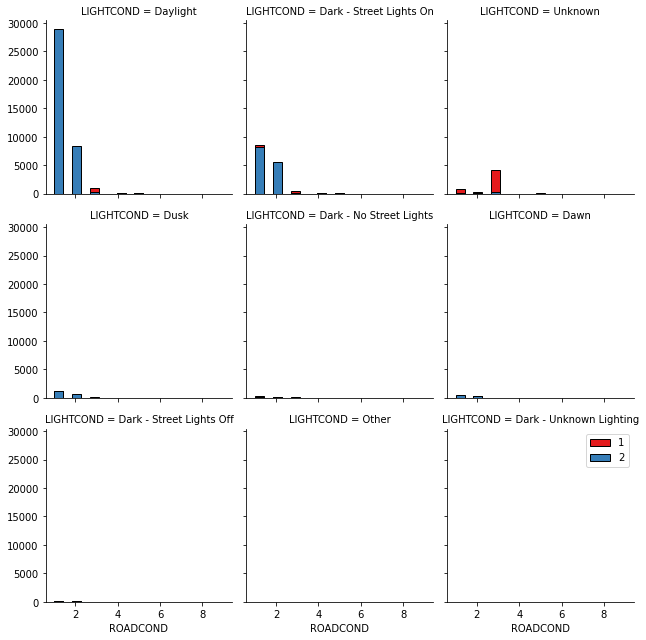

In [57]:
bins = np.linspace(df_downsampled.ROADCOND.min(), df_downsampled.ROADCOND.max(), 20) 
g = sns.FacetGrid(df_downsampled, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [58]:
df_downsampled['LIGHTCOND'] = df_downsampled['LIGHTCOND'].replace(['Daylight', 'Dark - Street Lights On','Unknown', \
                                                       'Dusk', 'Dawn', 'Dark - No Street Lights', \
                                                     'Dark - Street Lights Off', 'Other',\
                                                            'Dark - Unknown Lighting'], [1,2,3,4,5,6,7,8,9]) 

In [59]:
df_downsampled['WEATHER'] = df_downsampled['WEATHER'].replace(['Clear','Raining', 'Overcast', 'Unknown','Snowing', \
                                                         'Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain',\
                                                       'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy' ],\
                                                          [1,2,3,4,5,6,7,8,9,10,11])

In [60]:
df_downsampled.head()

,X,Y,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
75719,-122.391776,47.519743,1,1,1,1
62723,-122.309637,47.594251,1,1,1,1
31994,-122.376215,47.668667,1,1,1,1
77067,-122.329586,47.546694,1,1,1,3
103122,-122.313827,47.686694,1,1,1,1


In [61]:
df_downsampled[['ROADCOND', 'WEATHER', 'LIGHTCOND']].corr()

,ROADCOND,WEATHER,LIGHTCOND
ROADCOND,1.000000,0.584457,0.221101
WEATHER,0.584457,1.000000,0.215353
LIGHTCOND,0.221101,0.215353,1.000000


At certain locations the severity of accidents is high irrespective of weather and light conditions. It is also observed from above histograms of data that road conditions and weather conditions are more correlated and more severity of accidents are noticed when it is raining and roads are wet.

### The data is ready for modelling.

## Data Encoding

In [62]:
df_downsampled.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
1         2               0.520826
          1               0.479174
2         2               0.536926
          1               0.463074
3         1               0.888698
          2               0.111302
4         1               0.580442
          2               0.419558
5         1               0.679612
          2               0.320388
6         2               0.565217
          1               0.434783
7         1               0.628571
          2               0.371429
8         1               0.531915
          2               0.468085
9         2               0.625000
          1               0.375000
Name: SEVERITYCODE, dtype: float64

In [63]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [64]:
Feature = df_downsampled[['X','Y','ROADCOND','WEATHER','LIGHTCOND']]

In [65]:
x = Feature

In [66]:
y = df_downsampled['SEVERITYCODE'].values

In [67]:
x[0:5]

,X,Y,ROADCOND,WEATHER,LIGHTCOND
75719,-122.391776,47.519743,1,1,1
62723,-122.309637,47.594251,1,1,1
31994,-122.376215,47.668667,1,1,1
77067,-122.329586,47.546694,1,3,1
103122,-122.313827,47.686694,1,1,1


In [68]:
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data

In [69]:
from sklearn import preprocessing

In [70]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-2.05618687, -1.76471528, -0.58330168, -0.67291774, -0.56829869],
       [ 0.69493316, -0.45239034, -0.58330168, -0.67291774, -0.56829869],
       [-1.53496821,  0.85830327, -0.58330168, -0.67291774, -0.56829869],
       [ 0.0267753 , -1.29002909, -0.58330168,  1.21303306, -0.56829869],
       [ 0.55458883,  1.17581365, -0.58330168, -0.67291774, -0.56829869]])

# Classification

# K Nearest Neighbor(KNN)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (89620, 5) (89620,)
Test set: (22406, 5) (22406,)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [73]:
K = 50
mean_accuracy = np.zeros((K-1))
std_accuracy = np.zeros((K-1))

for n in range(1,K):
      
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, y_predict)
    print('K = %d'%n, "mean_accuracy = %2.8f" %mean_accuracy[n-1])
    std_accuracy[n-1]=np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])
    print('K = %d'%n, "std_accuracy = %2.8f" %std_accuracy[n-1])
print('For K = ', np.argmax(mean_accuracy)+1, 'mean_accuracy is maximum.', 'max value of mean_accuracy = %2.8f' %(np.max(mean_accuracy)))
print('For K = ', np.argmin(std_accuracy)+1, 'std_accuracy is minimum.', 'min value of std_accuracy = %2.8f' %(np.min(std_accuracy)))



K = 1 mean_accuracy = 0.59113630
K = 1 std_accuracy = 0.00328436
K = 2 mean_accuracy = 0.56810676
K = 2 std_accuracy = 0.00330918
K = 3 mean_accuracy = 0.58814603
K = 3 std_accuracy = 0.00328800
K = 4 mean_accuracy = 0.57270374
K = 4 std_accuracy = 0.00330482
K = 5 mean_accuracy = 0.58729805
K = 5 std_accuracy = 0.00328901
K = 6 mean_accuracy = 0.57221280
K = 6 std_accuracy = 0.00330530
K = 7 mean_accuracy = 0.58292422
K = 7 std_accuracy = 0.00329406
K = 8 mean_accuracy = 0.57377488
K = 8 std_accuracy = 0.00330376
K = 9 mean_accuracy = 0.58194234
K = 9 std_accuracy = 0.00329516
K = 10 mean_accuracy = 0.57399804
K = 10 std_accuracy = 0.00330353
K = 11 mean_accuracy = 0.57859502
K = 11 std_accuracy = 0.00329879
K = 12 mean_accuracy = 0.57355173
K = 12 std_accuracy = 0.00330398
K = 13 mean_accuracy = 0.57850576
K = 13 std_accuracy = 0.00329889
K = 14 mean_accuracy = 0.57252522
K = 14 std_accuracy = 0.00330499
K = 15 mean_accuracy = 0.57622958
K = 15 std_accuracy = 0.00330127
K = 16 mean_a

In [74]:
#build the KNN model with the best k
knn_best = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)

In [75]:
y_predict = knn_best.predict(X_test)

In [76]:
y_predict

array([2, 2, 2, ..., 2, 1, 2])

In [77]:
y_predict == y_test

array([ True,  True,  True, ..., False,  True, False])

# Decision Tree

In [78]:
from sklearn import tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dec_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [82]:
pred_tree = dec_tree.predict(X_test)

In [83]:
pred_tree == y_test

array([ True,  True,  True, ...,  True, False,  True])

# Support Vector Machine

In [84]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma = 'auto')
clf.fit(X_train, y_train) 

SVC(gamma='auto')

In [85]:
yhat = clf.predict(X_test)
yhat 

array([2, 2, 2, ..., 1, 1, 2])

In [86]:
yhat == y_test

array([ True,  True,  True, ...,  True,  True, False])

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [88]:
yhat_log = LR.predict(X_test)
yhat_log

array([2, 2, 2, ..., 2, 2, 1])

In [89]:
yhat_log == y_test

array([ True,  True,  True, ..., False, False,  True])

In [90]:
yhat_log1 = LR.predict_proba(X_test)

In [91]:
yhat_log1

array([[0.42499797, 0.57500203],
       [0.43657027, 0.56342973],
       [0.43583696, 0.56416304],
       ...,
       [0.47452005, 0.52547995],
       [0.46352282, 0.53647718],
       [0.54789256, 0.45210744]])

# Model Evaluation using Test set

In [92]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [93]:
df_test = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/Users/muralisankar2002/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
test_df = df_test
test_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [95]:
test_df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
INTKEY             65070
LOCATION          191996
EXCEPTRSNCODE      84811
EXCEPTRSNDESC       5638
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SDOTCOLNUM        114936
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [96]:
test_df_valid = test_df[['X', 'Y', 'SEVERITYCODE', 'ROADCOND', 'WEATHER', 'LIGHTCOND']]

In [97]:
test_df_valid.isnull().sum()

X               5334
Y               5334
SEVERITYCODE       0
ROADCOND        5012
WEATHER         5081
LIGHTCOND       5170
dtype: int64

In [98]:
test_df_valid = test_df_valid.dropna(how='any',axis=0) 

In [99]:
test_df_valid.count()

X               184167
Y               184167
SEVERITYCODE    184167
ROADCOND        184167
WEATHER         184167
LIGHTCOND       184167
dtype: int64

In [100]:
test_df_valid.isnull().sum()

X               0
Y               0
SEVERITYCODE    0
ROADCOND        0
WEATHER         0
LIGHTCOND       0
dtype: int64

In [101]:
test_df_valid['ROADCOND'] = test_df_valid['ROADCOND'].replace(['Dry','Wet', 'Unknown','Ice', 'Snow/Slush',\
                                                         'Other','Standing Water', 'Sand/Mud/Dirt','Oil'],\
                                                          [1,2,3,4,5,6,7,8,9])

In [102]:
test_df_valid['LIGHTCOND'] = test_df_valid['LIGHTCOND'].replace(['Daylight', 'Dark - Street Lights On','Unknown', \
                                                       'Dusk', 'Dawn', 'Dark - No Street Lights', \
                                                     'Dark - Street Lights Off', 'Other',\
                                                            'Dark - Unknown Lighting'], [1,2,3,4,5,6,7,8,9]) 

In [103]:
 test_df_valid['WEATHER'] = test_df_valid['WEATHER'].replace(['Clear','Raining', 'Overcast', 'Unknown','Snowing', \
                                                         'Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain',\
                                                       'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy' ],\
                                                          [1,2,3,4,5,6,7,8,9,10,11])

In [104]:
test_Feature = test_df_valid[['X','Y','ROADCOND','WEATHER','LIGHTCOND']]

In [105]:
test_Feature.head()

,X,Y,ROADCOND,WEATHER,LIGHTCOND
0,-122.323148,47.703140,2,3,1
1,-122.347294,47.647172,2,2,2
2,-122.334540,47.607871,1,3,1
3,-122.334803,47.604803,1,1,1
4,-122.306426,47.545739,2,2,1


In [106]:
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)

In [107]:
test_X[0:5]

array([[ 0.24496811,  1.48708375,  0.73356477,  1.12709078, -0.59169031],
       [-0.55942184,  0.49147384,  0.73356477,  0.21852424,  0.35932188],
       [-0.13452855, -0.20765144, -0.60334183,  1.12709078, -0.59169031],
       [-0.14330006, -0.26223759, -0.60334183, -0.69004229, -0.59169031],
       [ 0.80204361, -1.31291503,  0.73356477,  0.21852424, -0.59169031]])

In [108]:
test_y = test_df_valid['SEVERITYCODE'].values
test_y[0:5]

array([2, 1, 1, 1, 2])

In [109]:
yhat_knn = knn.predict(test_X)

In [110]:
yhat_dec = dec_tree.predict(test_X)

In [111]:
yhat_svm = clf.predict(test_X)

In [112]:
yhat_LR = LR.predict(test_X)

In [113]:
#Jaccard index for KNN Classification
J_1 = float("{:.2f}".format(jaccard_score(test_y, yhat_knn)))
print("Jaccard index for KNN Classification = {}".format(J_1))
#Jaccard index for Decision Tree Classification
J_2 = float("{:.2f}".format(jaccard_score(test_y, yhat_dec)))
print("Jaccard index for Decision Tree Classification = {}".format(J_2))
#Jaccard index for SVM Classification
J_3 = float("{:.2f}".format(jaccard_score(test_y, yhat_svm)))
print("Jaccard index for SVM Classification = {}".format(J_3))
#Jaccard index for LogisticRegression
J_4 = float("{:.2f}".format(jaccard_score(test_y, yhat_LR)))
print("Jaccard index for LogisticRegression = {}".format(J_4))

Jaccard index for KNN Classification = 0.42
Jaccard index for Decision Tree Classification = 0.36
Jaccard index for SVM Classification = 0.28
Jaccard index for LogisticRegression = 0.38


In [114]:
#F1-score for KNN Classification
F_1 = float("{:.2f}".format(f1_score(test_y, yhat_knn, labels=None, pos_label=1, average = 'weighted', sample_weight=None)))
print("F1_score for KNN Classification = {}".format(F_1))
#F1_score for Decision Tree Classification
F_2 = float("{:.2f}".format(f1_score(test_y, yhat_dec, labels=None, pos_label=1, average = 'weighted', sample_weight=None)))
print("F1_score for Decsion Tree  Classification = {}".format(F_2))
#F1-score for SVM
F_3 = float("{:.2f}".format(f1_score(test_y, yhat_svm, labels=None, pos_label=1, average = 'weighted', sample_weight=None)))
print("F1_score for SVM Classification = {}".format(F_3))
#F1-score for LogisticRegression
F_4 = float("{:.2f}".format(f1_score(test_y, yhat_LR, labels=None, pos_label=1, average = 'weighted', sample_weight=None)))
print("F1_score for LogisticRegression = {}".format(F_4))

F1_score for KNN Classification = 0.56
F1_score for Decsion Tree  Classification = 0.51
F1_score for SVM Classification = 0.45
F1_score for LogisticRegression = 0.52


In [115]:
#LogLoss for LogisticRegression
yhat_LR_1 = LR.predict_proba(test_X)
L_1 = float("{:.2f}".format(log_loss(test_y, yhat_LR_1, eps = 1e-15))) 
print("L_1 for LogisticRegression = {:.2f}".format(L_1))

L_1 for LogisticRegression = 0.69


# Report


In [116]:
Report = {'Algorithm':['KNN','Decision Tree', 'SVM', 'LogisticRegression'],
          'Jaccard': [J_1,J_2,J_3,J_4],
          'F1-score':[F_1,F_2,F_3,F_4],
           'LogLoss': ['NA','NA','NA',L_1]}

In [117]:
df_Report = pd.DataFrame(Report)
display(df_Report)

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.42,0.56,NA
1,Decision Tree,0.36,0.51,NA
2,SVM,0.28,0.45,NA
3,LogisticRegression,0.38,0.52,0.69


Logistic Regression model is more appropriate as the problem is fundamentally on binary classification.